In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read csv file
df = pd.read_csv("D:/BE practicals/ML/uber.csv")

In [3]:
#for basic information of entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# pre-prossing 

In [4]:
df.shape

(200000, 9)

In [5]:
#to display first five elements of dataset
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
#to display last five elements of dataset
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
#to find weather null values present or not
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
#remove unwanted features
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

In [10]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [12]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [13]:
# From the above output, we see that the data type of 'pickup_datetime' is 'object hence convert it into date time stamp variable 

In [14]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
# we will extract time feature from the 'pickup_datetime' 
# we will add a variable which measures the distance between pickup and drop

In [16]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [17]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [18]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [21]:
# function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

In [22]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [23]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539715


In [24]:
df = df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"], axis=1)

In [25]:
df

,fare_amount,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,1,19,7,5,2015,3,1.683323
1,7.7,1,20,17,7,2009,4,2.457590
2,12.9,1,21,24,8,2009,0,5.036377
3,5.3,3,8,26,6,2009,4,1.661683
4,16.0,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...
199995,3.0,1,10,28,10,2012,6,0.112210
199996,7.5,1,1,14,3,2014,4,1.875050
199997,30.9,2,0,29,6,2009,0,12.850319
199998,14.5,1,14,20,5,2015,2,3.539715


# identify Outliers 

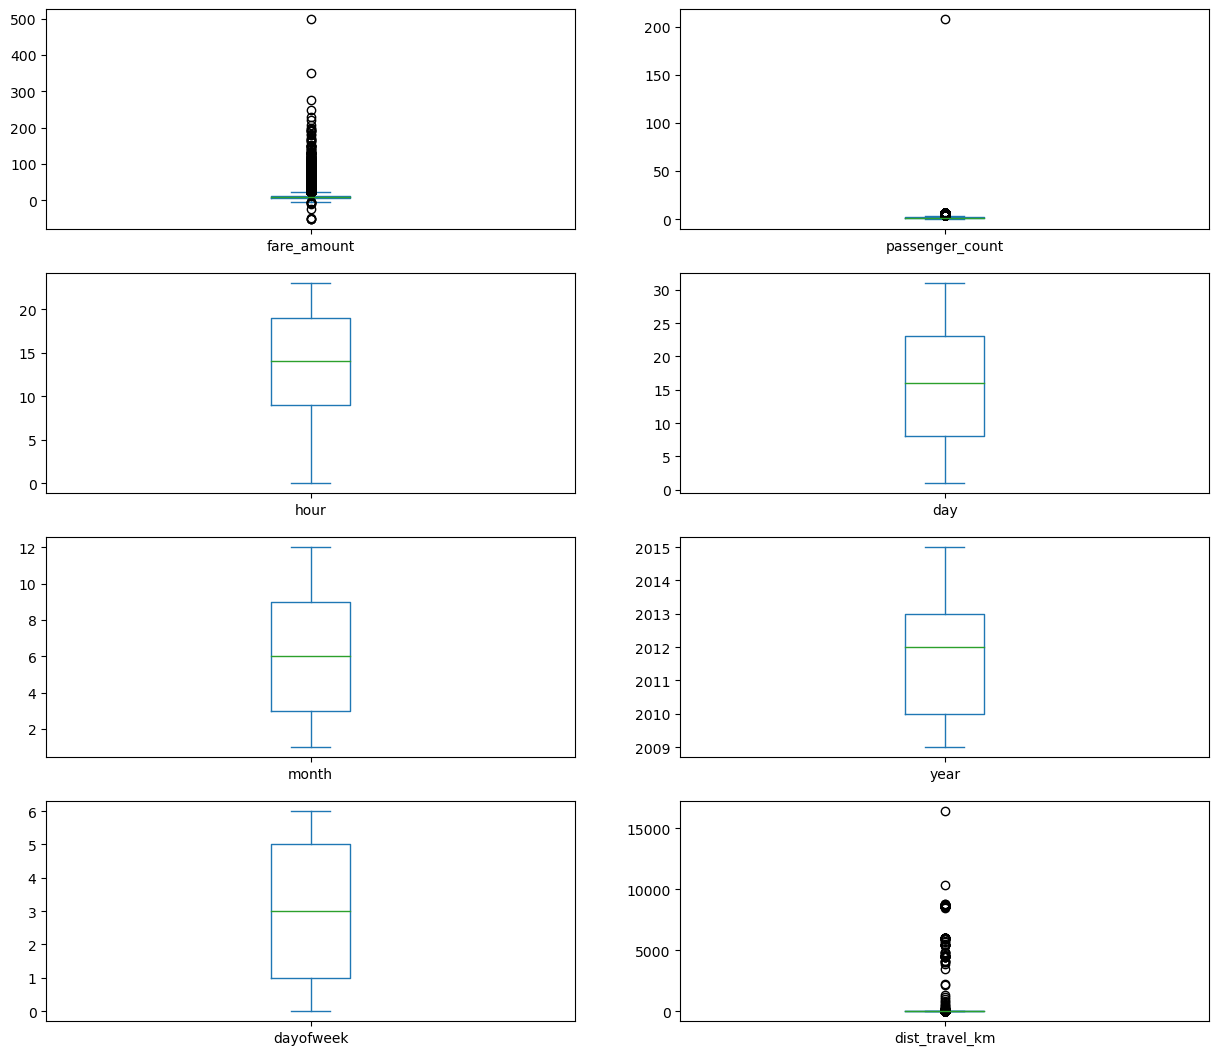

In [26]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [27]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [28]:
df = treat_outliers_all(df , df.iloc[: , 0::])


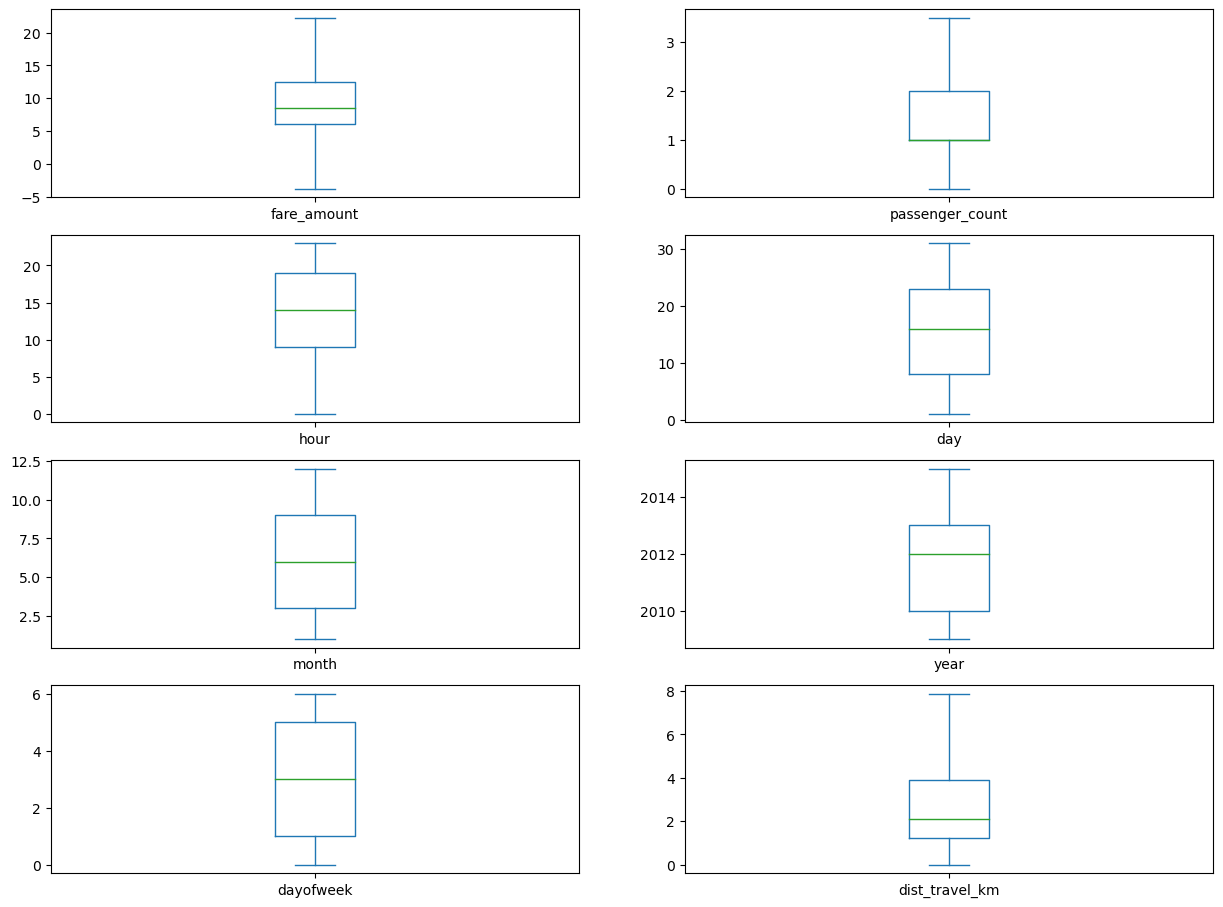

In [29]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

# Check the correlation

In [30]:
#Function to find the correlation
corr = df.corr() 
corr

,fare_amount,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
passenger_count,0.015778,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278
dayofweek,0.013652,0.048550,-0.086947,0.005617,-0.008786,0.006113,1.000000,0.027053
dist_travel_km,0.844374,0.009709,-0.038366,0.003062,0.011628,0.024278,0.027053,1.000000


<AxesSubplot:>

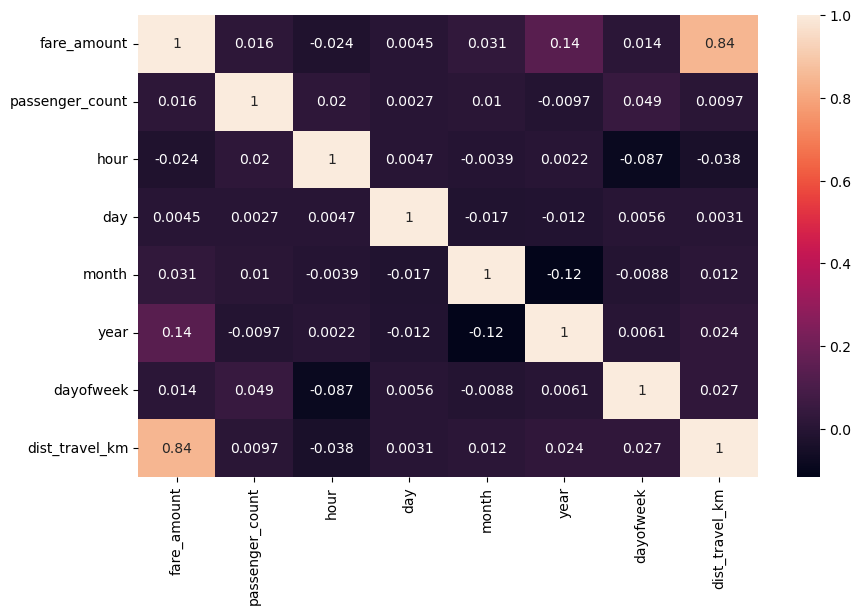

In [31]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

In [32]:
# Dividing the dataset into feature and target values 
df_x = df[['passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y = df['fare_amount']

In [33]:
# Dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred_lin = reg.predict(x_test)
print(y_pred_lin)

[ 6.14491439  5.81113903  9.51197223 ... 11.08641759 12.21586548
 12.22825314]


In [36]:
from sklearn.ensemble import RandomForestRegressor

#Here n_estimators means number of trees you want to build before making the prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[ 4.444  9.967  9.085 ... 13.05  11.26  14.495]


# Evaluate the models and compare their respective scores like R2, RMSE, etc

## R2 

In [38]:
from sklearn.metrics import r2_score

In [68]:
R2a = r2_score(y_test,y_pred_lin)
R2a

0.733660328972388

In [69]:
R2b = r2_score(y_test,y_pred_rf)
R2b

0.7764136394343168

## MSE

In [41]:
from sklearn.metrics import mean_squared_error

In [47]:
MSE1 = mean_squared_error(y_test,y_pred_lin)

In [51]:
MSE1

7.912883492856345

In [49]:
MSE2 = mean_squared_error(y_test,y_pred_rf)

In [52]:
MSE2

6.642693575920964

## RMSE

In [54]:
RMSE1 = np.sqrt(MSE1)

In [55]:
RMSE1

2.8129848013909258

In [56]:
RMSE2 = np.sqrt(MSE2)

In [57]:
RMSE2

2.577342347442606

## MAE

In [60]:
from sklearn.metrics import mean_absolute_error as mae

In [61]:
MAE1 = mae(y_test,y_pred_lin)

In [62]:
MAE1

1.8754475030971571

In [63]:
MAE2 = mae(y_test,y_pred_rf)

In [64]:
MAE2

1.698754686095238

In [65]:
cols = ['Model','R-Squared','MSE','RMSE','MAE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

In [70]:
from sklearn import metrics 

full_metrics = pd.Series({'Model': "Linear Regression",'R-Squared' : R2a,'MSE': MSE1,'RMSE':RMSE1,'MAE':MAE1})
# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,R-Squared,MSE,RMSE,MAE
0,Linear Regression,0.73366,7.912883,2.812985,1.875448


In [71]:
full_metrics = pd.Series({'Model': "Random Forest",'R-Squared' : R2b,'MSE': MSE2,'RMSE':RMSE2,'MAE':MAE2})
# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,R-Squared,MSE,RMSE,MAE
0,Linear Regression,0.733660,7.912883,2.812985,1.875448
1,Random Forest,0.776414,6.642694,2.577342,1.698755
